## Yelp Dataset Challenge

#### Problem Statement
Provide most appropriate recommendation of top 5 Health care services based on user review and location.

<b>Challenge</b>       : Yelp Dataset Challenge <br>

<b>Start date</b>   	: Jan. 15, 2019<br> 

<b>End date</b> 		: Dec. 31, 2019. <br>

<b>Link</b>		: https://www.yelp.com/dataset/challenge<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from sqlalchemy import create_engine
import re
import json
import pickle
from collections import Counter # for counting commong words
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


## Understanding of data

In [108]:
business_file=pd.read_json("D:/DMA yelp dataset/Yelp json files/business.json",lines=True)

In [3]:
business_file.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"Golf, Active Life",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","Specialty Food, Restaurants, Dim Sum, Imported...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","Sushi Bars, Restaurants, Japanese","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"Insurance, Financial Services","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Plumbing, Shopping, Local Services, Home Servi...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."


#### Plotting

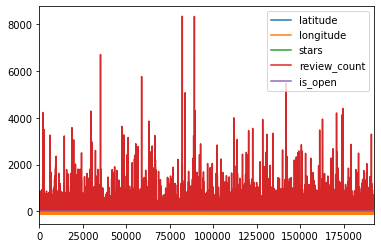

In [4]:
business_file.plot()
plt.show()

#### How much data we are missing?

In [5]:
## Compute NaN percentage of each feature (attribute).
business_nan = (business_file.isnull().sum() / business_file.shape[0]) * 100
business_nan

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes      14.971263
categories       0.250248
hours           23.275133
dtype: float64

### Data Visualization

#### [1] Stars

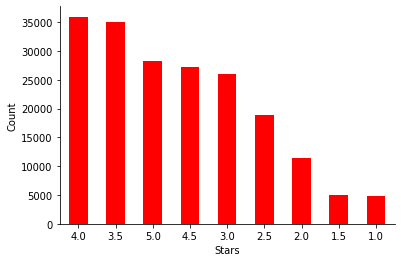

In [13]:
business_file.stars.value_counts(dropna = False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Stars')
plt.ylabel('Count')
sns.despine()

#### [2] is_open

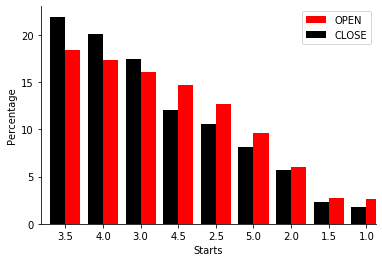

In [14]:
open = sum(business_file['is_open'] == 1)
close = sum(business_file['is_open'] == 0)

open_data = business_file.loc[business_file['is_open'] == 1, 'stars'].value_counts() / open * 100
claose_data = business_file.loc[business_file['is_open'] == 0, 'stars'].value_counts() / close * 100

## Plot bar graph
# Bar width
width = 0.4

open_data.plot(kind='bar',width=width,color='red',position=0,label='OPEN',rot=0)

claose_data.plot(kind='bar',width=width,color='black',position=1,label='CLOSE',rot=0)
plt.legend()
plt.xlabel('Starts')
plt.ylabel('Percentage')

sns.despine()
plt.show()

## Identifying different categories to which a Business belongs to.

In [15]:
business_categories=business_file.categories
business_file.columns.values

array(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'], dtype=object)

In [8]:
list=[]
for catg in business_categories:
    if catg is None:
        continue
    list.append(catg.split(','))


## Selecting unique business categories into a dictionary

In [9]:
dict={}
for i in list:
    for j in i:
        if j in dict.keys():
            dict[j]=dict.get(j)+1
        else:
            dict[j]=0+1

In [10]:
dict

{'Golf': 184,
 ' Active Life': 7202,
 'Specialty Food': 902,
 ' Restaurants': 41423,
 ' Dim Sum': 225,
 ' Imported Food': 337,
 ' Food': 21966,
 ' Chinese': 2867,
 ' Ethnic Food': 945,
 ' Seafood': 1916,
 'Sushi Bars': 651,
 ' Japanese': 1898,
 'Insurance': 223,
 ' Financial Services': 2082,
 'Plumbing': 362,
 ' Shopping': 24087,
 ' Local Services': 10519,
 ' Home Services': 14462,
 ' Kitchen & Bath': 781,
 ' Home & Garden': 5237,
 ' Water Heater Installation/Repair': 358,
 'Shipping Centers': 140,
 ' Couriers & Delivery Services': 288,
 ' Printing Services': 936,
 'Beauty & Spas': 5832,
 ' Hair Salons': 4885,
 'Hair Salons': 2070,
 ' Hair Stylists': 1567,
 ' Barbers': 1332,
 " Men's Hair Salons": 652,
 ' Cosmetics & Beauty Supply': 1740,
 ' Beauty & Spas': 13538,
 'Nail Salons': 1734,
 ' Day Spas': 2142,
 ' Nail Salons': 3309,
 ' Massage': 2173,
 'Local Services': 3413,
 ' Professional Services': 4921,
 ' Computers': 464,
 ' IT Services & Computer Repair': 1280,
 ' Internet Service Pr

In [11]:
print("Total number of categories : ",len(dict.keys()))

Total number of categories :  2468



## Similarlly reading other files

In [16]:
frames_review = []
for chunk in pd.read_json('D:/DMA yelp dataset/review.json', lines=True, chunksize = 20000):
    frames_review.append(chunk)
review=pd.concat(frames_review)

In [17]:
review.shape

(6685900, 9)

In [18]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5,0,0,0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5,0,0,0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1,7,0,0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [19]:
checkin=pd.read_json("D:/DMA yelp dataset/Yelp json files/checkin.json",lines=True)
checkin.head()

,business_id,date
0,--1UhMGODdWsrMastO9DZw,"2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016..."
1,--6MefnULPED_I942VcFNA,"2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012..."
2,--7zmmkVg-IMGaXbuVd0SQ,"2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015..."
3,--8LPVSo5i0Oo61X01sV9A,2016-07-08 16:43:30
4,--9QQLMTbFzLJ_oT-ON3Xw,"2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010..."


In [20]:
checkin.shape

(161950, 2)


## Getting all the details of businesses from User data

In [21]:
frames = []
for chunk in pd.read_json('D:/DMA yelp dataset/Yelp json files/user.json', lines=True, chunksize = 10000):
    frames.append(chunk)
user = pd.concat(frames)

In [22]:
user.shape

(1637138, 22)

In [23]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,l6BmjZMeQD3rDxWUbiAiow,Rashmi,95,2013-10-08 23:11:33,84,17,25,"2015,2016,2017","c78V-rj8NQcQjOI8KP3UEA, alRMgPcngYSCJ5naFRBz5g...",5,...,0,0,0,0,1,1,1,1,2,0
1,4XChL029mKr5hydo79Ljxg,Jenna,33,2013-02-21 22:29:06,48,22,16,,"kEBTgDvFX754S68FllfCaA, aB2DynOxNOJK9st2ZeGTPg...",4,...,0,0,0,0,0,0,1,1,0,0
2,bc8C_eETBWL0olvFSJJd0w,David,16,2013-10-04 00:16:10,28,8,10,,"4N-HU_T32hLENLntsNKNBg, pSY2vwWLgWfGVAAiKQzMng...",0,...,0,0,0,0,1,0,0,0,0,0
3,dD0gZpBctWGdWo9WlGuhlA,Angela,17,2014-05-22 15:57:30,30,4,14,,"RZ6wS38wnlXyj-OOdTzBxA, l5jxZh1KsgI8rMunm-GN6A...",5,...,0,0,0,0,0,2,0,0,1,0
4,MM4RJAeH6yuaN8oZDSt0RA,Nancy,361,2013-10-23 07:02:50,1114,279,665,"2015,2016,2017,2018","mbwrZ-RS76V1HoJ0bF_Geg, g64lOV39xSLRZO0aQQ6DeQ...",39,...,1,0,0,1,16,57,80,80,25,5



## Getting all the details of these Businesses from tip data

In [24]:
tip=pd.read_json("D:/DMA yelp dataset/Yelp json files/tip.json",lines=True)
tip.head()

,user_id,business_id,text,date,compliment_count
0,UPw5DWs_b-e2JRBS-t37Ag,VaKXUpmWTTWDKbpJ3aQdMw,"Great for watching games, ufc, and whatever el...",2014-03-27 03:51:24,0
1,Ocha4kZBHb4JK0lOWvE0sg,OPiPeoJiv92rENwbq76orA,Happy Hour 2-4 daily with 1/2 price drinks and...,2013-05-25 06:00:56,0
2,jRyO2V1pA4CdVVqCIOPc1Q,5KheTjYPu1HcQzQFtm4_vw,Good chips and salsa. Loud at times. Good serv...,2011-12-26 01:46:17,0
3,FuTJWFYm4UKqewaosss1KA,TkoyGi8J7YFjA6SbaRzrxg,The setting and decoration here is amazing. Co...,2014-03-23 21:32:49,0
4,LUlKtaM3nXd-E4N4uOk_fQ,AkL6Ous6A1atZejfZXn1Bg,Molly is definately taking a picture with Sant...,2012-10-06 00:19:27,0


In [25]:
tip.shape

(1223094, 5)

## Data selection

## Selecting Business related to Health care services

In [12]:
keywords=[]
f=open("C:/Users/Sushmita/Desktop/hm.txt","r")  #file containg names of Bussiness related to Health care services.
f1=f.readlines()

for x in f1:
    x=x.strip()
    keywords.append(x)

len(keywords)

64

## Selecting Business related to Health catre services from the Business dataset.

In [110]:
index=[]
for catg,ind in zip (business_file.categories,business_file.index):
    if catg is None:
        continue
    for kword in keywords:
        x=re.search(kword,catg)
        if x is None:
            continue
        else:
            index.append(ind)
            break

In [115]:
Health_data=business_file.iloc[index,:]              #slicing the dataset 

In [29]:
print("Total number of businesses come under Health & Medical : ",Health_data.shape[0])    #Total number of Businesses related to Hospital & medical

Total number of businesses come under Health & Medical :  20613


In [30]:
#Saving the dataframe as a JSON file.
Health_data.to_json("D:/DMA yelp dataset/Yelp json files/filtered_Health_data.json",lines=True,orient='records')
Health_data.shape[0]

20613

In [58]:
filtered_Health_data=pd.read_json("D:/DMA yelp dataset/Yelp json files/filtered_Health_data.json",lines=True)
filtered_Health_data.head(50)


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",Toronto,ON,M5V 1K4,43.645041,-79.395799,4.0,23,1,"{'AcceptsInsurance': 'True', 'ByAppointmentOnl...","Trainers, Health & Medical, Active Life, Physi...","{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ..."
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",Henderson,NV,89052,35.991159,-115.108455,2.5,13,0,{'ByAppointmentOnly': 'True'},"Medical Centers, Doctors, Obstetricians & Gyne...",None
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,Scottsdale,AZ,85254,33.616838,-111.927310,5.0,10,0,"{'ByAppointmentOnly': 'False', 'BusinessAccept...","Massage Therapy, Massage, Health & Medical, Be...","{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18..."
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",Mesa,AZ,85202,33.393546,-111.878890,5.0,3,1,{'ByAppointmentOnly': 'True'},"Health & Medical, Endodontists, Dentists","{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'..."
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,11,1,"{'ByAppointmentOnly': 'True', 'BusinessAccepts...","Health & Medical, Medical Centers",None
5,gS-IoDQSggdxPn2Sf1yfGQ,Desert Shores Dentistry,16515 S 40th St,Phoenix,AZ,85048,33.297318,-111.996450,5.0,5,1,{'ByAppointmentOnly': 'True'},"General Dentistry, Health & Medical, Dentists","{'Tuesday': '7:30-17:0', 'Wednesday': '7:30-17..."
6,iXkqd9uNods7YnxrnBq_RA,Spirit Apothecary,664 Broadway Ave,Bedford,OH,44146,41.391942,-81.536319,4.5,10,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","Home Decor, Cosmetics & Beauty Supply, Health ...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'..."
7,HHH_mrl-x694asUCs3SHeQ,Inspire! Dental,"4434 E Brown Rd, Ste 104",Mesa,AZ,85205,33.437778,-111.734964,5.0,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","General Dentistry, Dentists, Oral Surgeons, Co...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '..."
8,iA6IwYzo6qDmY7dZfXdzyg,"Wyatt Brad, DMD","5700 W Olive Ave, Ste 104",Glendale,AZ,85302,33.567806,-112.182662,5.0,5,0,{'ByAppointmentOnly': 'True'},"Health & Medical, Dentists, General Dentistry","{'Monday': '8:0-17:0', 'Tuesday': '7:0-17:0', ..."
9,CJ4hyISN5qHyqMGHcydZFg,enVoqueMD,"10155 E Via Linda, Ste H136",Scottsdale,AZ,85258,33.574364,-111.862107,3.5,7,1,"{'ByAppointmentOnly': 'True', 'WheelchairAcces...","Medical Centers, Beauty & Spas, Naturopathic/H...","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."


In [59]:
print(filtered_Health_data.shape)

(20613, 14)


In [32]:
## Compute NaN percentage of each feature (attribute).
health_medical_nan = (filtered_Health_data.isnull().sum() / filtered_Health_data.shape[0]) * 100
health_medical_nan

business_id      0.000000
name             0.000000
address          0.000000
city             0.000000
state            0.000000
postal_code      0.000000
latitude         0.000000
longitude        0.000000
stars            0.000000
review_count     0.000000
is_open          0.000000
attributes      13.593363
categories       0.000000
hours           17.076602
dtype: float64

In [33]:
filtered_Health_data.hours

0        {'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...
1                                                     None
2        {'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...
3        {'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...
4                                                     None
                               ...                        
20608    {'Monday': '0:0-0:0', 'Tuesday': '12:0-19:0', ...
20609    {'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...
20610    {'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...
20611    {'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'...
20612    {'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...
Name: hours, Length: 20613, dtype: object

In [34]:
filtered_Health_data.hours[0]

{'Monday': '6:0-22:0',
 'Tuesday': '6:0-22:0',
 'Wednesday': '6:0-22:0',
 'Thursday': '6:0-22:0',
 'Friday': '6:0-22:0',
 'Saturday': '8:0-18:0',
 'Sunday': '9:0-18:0'}

In [35]:
filtered_Health_data.hours[0].keys()

dict_keys(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

## Selecting only the Health care service  businesses that are open.

In [36]:
filtered_Health_data.is_open
index=[]

for open_data,ind in zip (filtered_Health_data.is_open,filtered_Health_data.index):
    if open_data==1:
        index.append(ind)

In [37]:
#Total number of businesses tha are currently open.
len(index)

19013

In [38]:
Health_data_open = business_file.iloc[index,:]

In [39]:
Health_data_open.shape

(19013, 14)

In [40]:
Health_data_open.to_json("D:/DMA yelp dataset/Yelp json files/filtered_Health_data_open.json",lines=True,orient='records')
filtered_Health_data_open=pd.read_json('D:/DMA yelp dataset/Yelp json files/filtered_Health_data_open.json',lines=True)

In [41]:
filtered_Health_data.head()
category= 'Health & Medical'
category_list=[]

index = []
flag=0
pattern=r"[,]"
for catg,ind in zip (filtered_Health_data.categories,filtered_Health_data.index):
    if catg is None:
        continue
    x=re.search(category,catg)

    if x is None:
        continue
    else:
        category_list.append(catg)
        index.append(ind)
filtered_Health_data.categories.count()

20613

In [42]:
required_business_id = []
print(len(index))
for i in index:
    required_business_id.append(filtered_Health_data.business_id[i])
index[1:]
filtered_Health_data.attributes[1]

17171


{'ByAppointmentOnly': 'True'}

In [43]:
filtered_Health_data.attributes[1:10]

1                        {'ByAppointmentOnly': 'True'}
2    {'ByAppointmentOnly': 'False', 'BusinessAccept...
3                        {'ByAppointmentOnly': 'True'}
4    {'ByAppointmentOnly': 'True', 'BusinessAccepts...
5                        {'ByAppointmentOnly': 'True'}
6    {'BusinessAcceptsBitcoin': 'False', 'ByAppoint...
7    {'BusinessAcceptsCreditCards': 'True', 'ByAppo...
8                        {'ByAppointmentOnly': 'True'}
9    {'ByAppointmentOnly': 'True', 'WheelchairAcces...
Name: attributes, dtype: object

In [44]:
ByAppointmentOnly=0
NotByAppointment=0
ByAppointment_Not_Specified=0
for i in index:
    if filtered_Health_data.attributes[i] is None:
        ByAppointment_Not_Specified=ByAppointment_Not_Specified+1
        continue
    
    if ('ByAppointmentOnly' not in filtered_Health_data.attributes[i].keys()):
        continue

    if (filtered_Health_data.attributes[i]['ByAppointmentOnly']=='True'):
       ByAppointmentOnly=ByAppointmentOnly+1
    if (filtered_Health_data.attributes[i]['ByAppointmentOnly']=='False'):
       NotByAppointment=NotByAppointment+1
    
        
print("ByAppointmentOnly : ",ByAppointmentOnly,"\nNotByAppointment : ",NotByAppointment,"\nByAppointment_Not_Specified :",ByAppointment_Not_Specified)    

ByAppointmentOnly :  10287 
NotByAppointment :  4356 
ByAppointment_Not_Specified : 1537


In [45]:
AcceptsInsurance=0
NotAcceptsInsurance=0
AcceptsInsurance_Not_Specified=0
for i in index:
    if filtered_Health_data.attributes[i] is None:
        AcceptsInsurance_Not_Specified=AcceptsInsurance_Not_Specified+1
        continue
    
    if ('AcceptsInsurance' not in filtered_Health_data.attributes[i].keys()):
        continue

    if (filtered_Health_data.attributes[i]['AcceptsInsurance']=='True'):
       AcceptsInsurance=AcceptsInsurance+1
    if (filtered_Health_data.attributes[i]['AcceptsInsurance']=='False'):
       NotAcceptsInsurance=NotAcceptsInsurance+1
    
        
print("AcceptsInsurance : ",AcceptsInsurance,"\nNotAcceptsInsurance : ",NotAcceptsInsurance,"\nAcceptsInsurance_Not_Specified : ",AcceptsInsurance_Not_Specified)    

AcceptsInsurance :  5228 
NotAcceptsInsurance :  1737 
AcceptsInsurance_Not_Specified :  1537


In [46]:
ListOfAttributes=['ByAppointmentOnly','AcceptsInsurance','BikeParking','BusinessAcceptsCreditCards','GoodForKids','WheelchairAccessible','DogsAllowed']
for j in ListOfAttributes:
    present=0
    absent=0
    No_Attribute=0
    No_Attributes=0
    for i in index:
        if filtered_Health_data.attributes[i] is None:
            No_Attributes=No_Attributes+1
            continue

        if (j not in filtered_Health_data.attributes[i].keys()):
            No_Attribute=No_Attribute+1
            continue

        if (filtered_Health_data.attributes[i][j]=='True'):
           present=present+1
        if (filtered_Health_data.attributes[i][j]=='False'):
           absent=absent+1
    #print("Attribute","True","False","Not_Specified")
    print(j,"\nTrue : ",present,"\t\tFalse : ",absent,"\t\tNot_Specified : ",No_Attribute)

ByAppointmentOnly 
True :  10287 		False :  4356 		Not_Specified :  970
AcceptsInsurance 
True :  5228 		False :  1737 		Not_Specified :  8657
BikeParking 
True :  2994 		False :  640 		Not_Specified :  11992
BusinessAcceptsCreditCards 
True :  10334 		False :  300 		Not_Specified :  4979
GoodForKids 
True :  477 		False :  299 		Not_Specified :  14856
WheelchairAccessible 
True :  1336 		False :  226 		Not_Specified :  14066
DogsAllowed 
True :  92 		False :  181 		Not_Specified :  15359


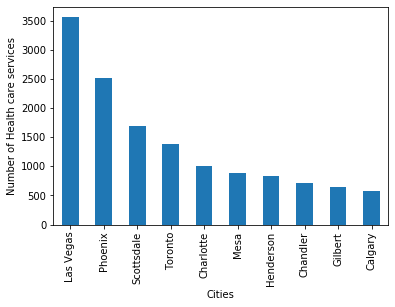

In [47]:
City_data = filtered_Health_data.city.value_counts()

City_data.head(10).plot(kind='bar')
plt.xlabel('Cities')
plt.ylabel('Number of Health care services')
plt.show()

#### Analysis: 
- We have observed that Las Vegas city has the highest number of health care services.


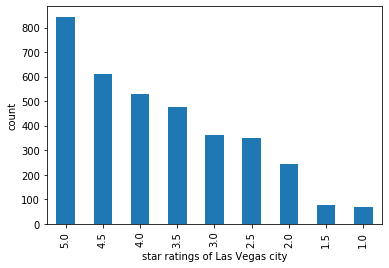

In [48]:
Las_Vegas_data=filtered_Health_data[filtered_Health_data.city=="Las Vegas"]
Las_Vegas_data=Las_Vegas_data.stars.value_counts()
Las_Vegas_data.plot(kind='bar')
plt.xlabel('star ratings of Las Vegas city')
plt.ylabel('count')
plt.show()

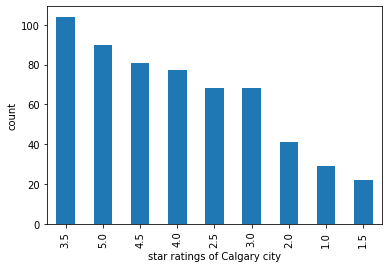

In [49]:
Calgary_data=filtered_Health_data[filtered_Health_data.city=="Calgary"]
Calgary_data=Calgary_data.stars.value_counts()
Calgary_data.plot(kind='bar')
plt.xlabel('star ratings of Calgary city')
plt.ylabel('count')
plt.show()

####  Flow of Data Preprocessing:
- By creating a new dataframe filtered_Health_data, we were able to filter 'review' file by matching its 'business_id' with       'business_id' in dataframe'filtered_Health_data', creating a new dataframe 'health_review'.
- Using the same logic, we then were able to filter 'user' dataframe by matching its 'user_id' with 'user_id' in 
  'health_review'.

- The new dataframe 'health_review'contains all customers who have been to at least one Health care service and left a review.

- Same as the rest two dataframes, new dataframes 'health_tip', 'health_checkin' were created by matching 'business_id'

- To avoid importing data from the large json files every time, we converted the new dataframes to pickle files for future use.

In [50]:
filtered_Health_data.to_pickle('filtered_Health_data.pickle')


In [52]:
health_review=review.loc[review['business_id'].isin(filtered_Health_data['business_id'].unique())]

In [53]:
health_review.reset_index(drop=True).head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
2,xQksr0gAyssKdnP2olE0Ow,vVhE4lGdsGK5rQgBfOGFxA,9MbGG8PxrlpBWVm3QyWy_g,1,3,0,0,I am years out from surgery with sacs and I wi...,2016-09-18 15:19:33
3,ER_W7XbsHuxs24UcLnTzWg,lOV7GDN5azjfW81xKma4Xw,R_atwP6fr34SoXcOuGDp0A,5,0,0,0,Dr.K. & Dr.B. together with their Agape team a...,2017-03-27 01:42:21
4,m7eosmcK66RU_61UHbNMww,0v0aVNJEixurV1Ib0iqzJg,PFmB_iraAbTN9XMka7soqQ,5,1,0,0,Today was my first time seeing the staff at Be...,2017-06-27 22:49:09


In [54]:
health_review.shape

(330992, 9)

In [55]:
health_review.to_pickle('health_review.pickle')

### Analysis of messy data in the attribute column of business file:
- To fix this issue where each item inside is a dictionary with values, attributes acts as a filter on Yelp that customers       can click to identify the health care service. For eg. WheelchairAccessible = Yes would be selected (or tick marked) while     making a selection on Yelp.



In [60]:
filtered_Health_data.isnull().sum()

business_id        0
name               0
address            0
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
attributes      2802
categories         0
hours           3520
dtype: int64

+ We have split the atributes column with dictionary to different filters.

In [61]:
filtered_Health_data['attributes'].apply(pd.Series).head()
# Split the attributes dictionary into all its values

,AcceptsInsurance,ByAppointmentOnly,GoodForKids,WheelchairAccessible,BusinessAcceptsCreditCards,BusinessAcceptsBitcoin,BikeParking,BusinessParking,RestaurantsPriceRange2,Ambience,...,HairSpecializesIn,DriveThru,HappyHour,AgesAllowed,BestNights,CoatCheck,Music,GoodForDancing,Corkage,BYOBCorkage
0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,False,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
health_data_attribute = filtered_Health_data['attributes'].apply(pd.Series)
list(health_data_attribute.columns)

['AcceptsInsurance',
 'ByAppointmentOnly',
 'GoodForKids',
 'WheelchairAccessible',
 'BusinessAcceptsCreditCards',
 'BusinessAcceptsBitcoin',
 'BikeParking',
 'BusinessParking',
 'RestaurantsPriceRange2',
 'Ambience',
 'WiFi',
 'RestaurantsReservations',
 'RestaurantsAttire',
 'RestaurantsGoodForGroups',
 'Caters',
 'RestaurantsDelivery',
 'OutdoorSeating',
 'Alcohol',
 'RestaurantsTakeOut',
 'HasTV',
 'DogsAllowed',
 'Smoking',
 'GoodForMeal',
 'RestaurantsTableService',
 'NoiseLevel',
 'DietaryRestrictions',
 'HairSpecializesIn',
 'DriveThru',
 'HappyHour',
 'AgesAllowed',
 'BestNights',
 'CoatCheck',
 'Music',
 'GoodForDancing',
 'Corkage',
 'BYOBCorkage']

In [65]:

## Compute NaN percentage of each feature (attribute).
health_data_attribute_nan = (health_data_attribute.isnull().sum() / health_data_attribute.shape[0]) * 100
health_data_attribute_nan

AcceptsInsurance              66.142725
ByAppointmentOnly             26.653083
GoodForKids                   95.585310
WheelchairAccessible          91.345268
BusinessAcceptsCreditCards    40.193082
BusinessAcceptsBitcoin        96.191724
BikeParking                   73.851453
BusinessParking               70.101392
RestaurantsPriceRange2        72.041915
Ambience                      99.315966
WiFi                          98.520351
RestaurantsReservations       99.131616
RestaurantsAttire             99.306263
RestaurantsGoodForGroups      99.214088
Caters                        95.430068
RestaurantsDelivery           98.365109
OutdoorSeating                99.160724
Alcohol                       98.680444
RestaurantsTakeOut            93.499248
HasTV                         99.301412
DogsAllowed                   98.214719
Smoking                       99.776840
GoodForMeal                   99.451802
RestaurantsTableService       99.679814
NoiseLevel                    99.403289


### Summary of actions:
- Concatenating the attributes to the dataframe.
- Since there are a lot of missing values in most of the columns, we have cherry-picked a few columns out of the list and         included a few filters for our analysis.

In [67]:
health_data_final2 = pd.concat([filtered_Health_data.drop(['attributes'], axis=1), filtered_Health_data['attributes'].apply(pd.Series)], axis=1)
health_data_final2.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,HairSpecializesIn,DriveThru,HappyHour,AgesAllowed,BestNights,CoatCheck,Music,GoodForDancing,Corkage,BYOBCorkage
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",Toronto,ON,M5V 1K4,43.645041,-79.395799,4.0,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",Henderson,NV,89052,35.991159,-115.108455,2.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,Scottsdale,AZ,85254,33.616838,-111.927310,5.0,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",Mesa,AZ,85202,33.393546,-111.878890,5.0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,Cleveland,OH,44106,41.513554,-81.613752,3.5,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
health_data_final2.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'categories', 'hours', 'AcceptsInsurance', 'ByAppointmentOnly',
       'GoodForKids', 'WheelchairAccessible', 'BusinessAcceptsCreditCards',
       'BusinessAcceptsBitcoin', 'BikeParking', 'BusinessParking',
       'RestaurantsPriceRange2', 'Ambience', 'WiFi', 'RestaurantsReservations',
       'RestaurantsAttire', 'RestaurantsGoodForGroups', 'Caters',
       'RestaurantsDelivery', 'OutdoorSeating', 'Alcohol',
       'RestaurantsTakeOut', 'HasTV', 'DogsAllowed', 'Smoking', 'GoodForMeal',
       'RestaurantsTableService', 'NoiseLevel', 'DietaryRestrictions',
       'HairSpecializesIn', 'DriveThru', 'HappyHour', 'AgesAllowed',
       'BestNights', 'CoatCheck', 'Music', 'GoodForDancing', 'Corkage',
       'BYOBCorkage'],
      dtype='object')

In [69]:
health_data_final2 = health_data_final2[['name', 'business_id', 'address','postal_code','city',
                                         'hours','latitude','longitude','review_count','stars',
                                         'BusinessAcceptsCreditCards','AcceptsInsurance',
                                         'ByAppointmentOnly','categories']]

In [70]:
health_data_final2.shape

(20613, 14)

In [71]:

## Compute NaN percentage of each feature (attribute).
health_data_final2_nan = (health_data_final2.isnull().sum() / health_data_final2.shape[0]) * 100
health_data_final2_nan

name                           0.000000
business_id                    0.000000
address                        0.000000
postal_code                    0.000000
city                           0.000000
hours                         17.076602
latitude                       0.000000
longitude                      0.000000
review_count                   0.000000
stars                          0.000000
BusinessAcceptsCreditCards    40.193082
AcceptsInsurance              66.142725
ByAppointmentOnly             26.653083
categories                     0.000000
dtype: float64

In [72]:
health_data_final2.fillna(value=pd.np.nan, inplace=True)
health_data_final2['BusinessAcceptsCreditCards'].unique()

array([nan, 'True', 'False', 'None'], dtype=object)

In [73]:
health_data_final2.shape

(20613, 14)

In [ ]:
health_data_final2.to_pickle('Final_business_file.pickle')


In [2]:
Final_business_file_data1 = open("Final_business_file.pickle","rb")
Final_business_file = pickle.load(Final_business_file_data1)
Final_business_file.head()

,name,business_id,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories
0,Totum Life Science,zSpQmEBvRe3IhTUlMSA6HQ,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4.0,NaN,True,False,"Trainers, Health & Medical, Active Life, Physi..."
1,A Woman's Place,n2kOsDur7tCLygSa87glJQ,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,NaN,35.991159,-115.108455,13,2.5,NaN,NaN,True,"Medical Centers, Doctors, Obstetricians & Gyne..."
2,Key To Healing Massage,teknANRU8ZKnwdIHWYyd8Q,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5.0,True,NaN,False,"Massage Therapy, Massage, Health & Medical, Be..."
3,"Stephen L Walker, DDS, MS",5ws3QWQXUhqTeLd7IZsDww,"2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5.0,NaN,NaN,True,"Health & Medical, Endodontists, Dentists"
4,Louis Stokes Cleveland VA Medical Center,YNvZdMLXa4q8e9tiE4ge4A,10701 E Blvd,44106,Cleveland,NaN,41.513554,-81.613752,11,3.5,True,NaN,True,"Health & Medical, Medical Centers"


In [3]:
Final_business_file.shape

(20613, 14)

In [4]:
Final_business_file_data1 = open("Final_business_file.pickle","rb")
business = pickle.load(Final_business_file_data1)
business.head()

,name,business_id,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories
0,Totum Life Science,zSpQmEBvRe3IhTUlMSA6HQ,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4.0,NaN,True,False,"Trainers, Health & Medical, Active Life, Physi..."
1,A Woman's Place,n2kOsDur7tCLygSa87glJQ,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,NaN,35.991159,-115.108455,13,2.5,NaN,NaN,True,"Medical Centers, Doctors, Obstetricians & Gyne..."
2,Key To Healing Massage,teknANRU8ZKnwdIHWYyd8Q,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5.0,True,NaN,False,"Massage Therapy, Massage, Health & Medical, Be..."
3,"Stephen L Walker, DDS, MS",5ws3QWQXUhqTeLd7IZsDww,"2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5.0,NaN,NaN,True,"Health & Medical, Endodontists, Dentists"
4,Louis Stokes Cleveland VA Medical Center,YNvZdMLXa4q8e9tiE4ge4A,10701 E Blvd,44106,Cleveland,NaN,41.513554,-81.613752,11,3.5,True,NaN,True,"Health & Medical, Medical Centers"


In [5]:
business.shape

(20613, 14)

In [6]:
## Compute NaN percentage of each feature (attribute).
business_nan = (business.isnull().sum() / business.shape[0]) * 100
business_nan

name                           0.000000
business_id                    0.000000
address                        0.000000
postal_code                    0.000000
city                           0.000000
hours                         17.076602
latitude                       0.000000
longitude                      0.000000
review_count                   0.000000
stars                          0.000000
BusinessAcceptsCreditCards    40.193082
AcceptsInsurance              66.142725
ByAppointmentOnly             26.653083
categories                     0.000000
dtype: float64

In [7]:
business=business.dropna(subset=['BusinessAcceptsCreditCards','AcceptsInsurance','ByAppointmentOnly'],how='all')

In [8]:
business['BusinessAcceptsCreditCards'].fillna(business['BusinessAcceptsCreditCards'].mode()[0],inplace=True)
business['AcceptsInsurance'].fillna(business['AcceptsInsurance'].mode()[0],inplace=True)
business['ByAppointmentOnly'].fillna(business['ByAppointmentOnly'].mode()[0],inplace=True)

In [9]:
business.shape

(17163, 14)

In [10]:
business['BusinessAcceptsCreditCards'].unique()

array(['True', 'False', 'None'], dtype=object)

In [11]:
business.BusinessAcceptsCreditCards.replace('True',1,inplace=True)
business.BusinessAcceptsCreditCards.replace('False',0,inplace=True)
business.BusinessAcceptsCreditCards.replace('None',0,inplace=True)

In [12]:
business.AcceptsInsurance.replace('True',1,inplace=True)
business.AcceptsInsurance.replace('False',0,inplace=True)
business.AcceptsInsurance.replace('None',0,inplace=True)

In [13]:
business.ByAppointmentOnly.replace('True',1,inplace=True)
business.ByAppointmentOnly.replace('False',0,inplace=True)
business.ByAppointmentOnly.replace('None',0,inplace=True)

In [14]:
review_data = open("Nnew_Review.pickle","rb")
new_review_data = pickle.load(review_data)
new_review_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,xQksr0gAyssKdnP2olE0Ow,vVhE4lGdsGK5rQgBfOGFxA,9MbGG8PxrlpBWVm3QyWy_g,1,3,0,0,I am years out from surgery with sacs and I wi...,2016-09-18 15:19:33
4,ER_W7XbsHuxs24UcLnTzWg,lOV7GDN5azjfW81xKma4Xw,R_atwP6fr34SoXcOuGDp0A,5,0,0,0,Dr.K. & Dr.B. together with their Agape team a...,2017-03-27 01:42:21
5,m7eosmcK66RU_61UHbNMww,0v0aVNJEixurV1Ib0iqzJg,PFmB_iraAbTN9XMka7soqQ,5,1,0,0,Today was my first time seeing the staff at Be...,2017-06-27 22:49:09


In [15]:
new_review_data.shape

(330992, 9)

In [16]:

## Compute NaN percentage of each feature (attribute).
new_review_data_nan = (new_review_data.isnull().sum() / new_review_data.shape[0]) * 100
new_review_data_nan

review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
text           0.0
date           0.0
dtype: float64

## Text preprocessing

- Text cleansing of Review dataset and add another column called cleared_text to it.
- The first pre-processing step which we will do is transform our review text into lower case.
- This avoids having multiple copies of the same words.
- The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing   all instances of it will help us reduce the size of the data.

In [17]:
import nltk # preprocessing text
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import string # for finding punctuation in text

def preprocess(text):
    text = re.sub('[^a-z\s]', '', text.lower())                  # get rid of noise
    text = [word for word in text.split() if word not in set(stopwords)]  # remove stopwords
    return ' '.join(text) # then join the text again
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)

new_review_data['cleared_text'] = new_review_data['text'].apply(preprocess)

In [18]:
new_review_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleared_text
1,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,total bill horrible service gs crooks actually...
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,say office really together organized friendly ...
3,xQksr0gAyssKdnP2olE0Ow,vVhE4lGdsGK5rQgBfOGFxA,9MbGG8PxrlpBWVm3QyWy_g,1,3,0,0,I am years out from surgery with sacs and I wi...,2016-09-18 15:19:33,years surgery sacs wish could turn back time p...
4,ER_W7XbsHuxs24UcLnTzWg,lOV7GDN5azjfW81xKma4Xw,R_atwP6fr34SoXcOuGDp0A,5,0,0,0,Dr.K. & Dr.B. together with their Agape team a...,2017-03-27 01:42:21,drk drb together agape team caring professiona...
5,m7eosmcK66RU_61UHbNMww,0v0aVNJEixurV1Ib0iqzJg,PFmB_iraAbTN9XMka7soqQ,5,1,0,0,Today was my first time seeing the staff at Be...,2017-06-27 22:49:09,today first time seeing staff bella smile grea...


### Calculate the mean of Ratings for each Health care service.

In [19]:
from textblob import TextBlob

def sentiment(text):
    sentiment = TextBlob(text)
    return sentiment.sentiment.polarity

new_review_data['sentiment_polarity'] = new_review_data['cleared_text'].apply(sentiment)


In [20]:
new_review_data.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,cleared_text,sentiment_polarity
1,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1,6,1,0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36,total bill horrible service gs crooks actually...,-0.333333
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5,3,0,0,I have to say that this office really has it t...,2016-11-09 20:09:03,say office really together organized friendly ...,0.381000
3,xQksr0gAyssKdnP2olE0Ow,vVhE4lGdsGK5rQgBfOGFxA,9MbGG8PxrlpBWVm3QyWy_g,1,3,0,0,I am years out from surgery with sacs and I wi...,2016-09-18 15:19:33,years surgery sacs wish could turn back time p...,0.025000
4,ER_W7XbsHuxs24UcLnTzWg,lOV7GDN5azjfW81xKma4Xw,R_atwP6fr34SoXcOuGDp0A,5,0,0,0,Dr.K. & Dr.B. together with their Agape team a...,2017-03-27 01:42:21,drk drb together agape team caring professiona...,0.000000
5,m7eosmcK66RU_61UHbNMww,0v0aVNJEixurV1Ib0iqzJg,PFmB_iraAbTN9XMka7soqQ,5,1,0,0,Today was my first time seeing the staff at Be...,2017-06-27 22:49:09,today first time seeing staff bella smile grea...,0.270000


In [21]:
## Compute NaN percentage of each feature (attribute).
new_review_data_nan1 = (new_review_data.isnull().sum() / new_review_data.shape[0]) * 100
new_review_data_nan1

review_id             0.0
user_id               0.0
business_id           0.0
stars                 0.0
useful                0.0
funny                 0.0
cool                  0.0
text                  0.0
date                  0.0
cleared_text          0.0
sentiment_polarity    0.0
dtype: float64

In [22]:
sentiment=new_review_data.groupby(by='business_id')['sentiment_polarity'].mean().sort_values(ascending=False)
sentiment.head()

business_id
Ch9onLp5yDII7F7LCoJI5Q    0.722222
jo5iOXm5zYjopZ-lUhSA7w    0.714815
toAZBzl299VBHiFHHZxrCA    0.709583
4zOuQt1DFWv5hSnN-g3bEQ    0.689833
HATyHmtiz4MGdM7IUvJbtQ    0.680556
Name: sentiment_polarity, dtype: float64

In [23]:
business.set_index('business_id',inplace=True)
business['sentiment']=sentiment

In [24]:
business.head()

,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
business_id,,,,,,,,,,,,,,
zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4.0,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,NaN,35.991159,-115.108455,13,2.5,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5.0,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5.0,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,NaN,41.513554,-81.613752,11,3.5,1,1,1,"Health & Medical, Medical Centers",0.201154


In [25]:
business = business.reset_index()
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4.0,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,NaN,35.991159,-115.108455,13,2.5,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5.0,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5.0,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,NaN,41.513554,-81.613752,11,3.5,1,1,1,"Health & Medical, Medical Centers",0.201154


In [26]:

## Compute NaN percentage of each feature (attribute).
business_nan = (business.isnull().sum() / business.shape[0]) * 100
business_nan

business_id                    0.000000
name                           0.000000
address                        0.000000
postal_code                    0.000000
city                           0.000000
hours                         15.049816
latitude                       0.000000
longitude                      0.000000
review_count                   0.000000
stars                          0.000000
BusinessAcceptsCreditCards     0.000000
AcceptsInsurance               0.000000
ByAppointmentOnly              0.000000
categories                     0.000000
sentiment                      0.000000
dtype: float64

In [27]:
business['stars']=np.ceil(business.stars).astype(int)

In [28]:
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,NaN,35.991159,-115.108455,13,3,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,NaN,41.513554,-81.613752,11,4,1,1,1,"Health & Medical, Medical Centers",0.201154


In [29]:
#Saving the dataframe as a JSON file.
business.to_json("Final_dataset.json",lines=True,orient='records')
business.shape[0]

17163

In [2]:
business=pd.read_json("Final_dataset.json",lines=True)
business.head(50)

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,None,35.991159,-115.108455,13,3,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,None,41.513554,-81.613752,11,4,1,1,1,"Health & Medical, Medical Centers",0.201154
5,gS-IoDQSggdxPn2Sf1yfGQ,Desert Shores Dentistry,16515 S 40th St,85048,Phoenix,"{'Tuesday': '7:30-17:0', 'Wednesday': '7:30-17...",33.297318,-111.996450,5,5,1,1,1,"General Dentistry, Health & Medical, Dentists",0.277102
6,iXkqd9uNods7YnxrnBq_RA,Spirit Apothecary,664 Broadway Ave,44146,Bedford,"{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",41.391942,-81.536319,10,5,1,1,0,"Home Decor, Cosmetics & Beauty Supply, Health ...",0.343710
7,HHH_mrl-x694asUCs3SHeQ,Inspire! Dental,"4434 E Brown Rd, Ste 104",85205,Mesa,"{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",33.437778,-111.734964,26,5,1,1,1,"General Dentistry, Dentists, Oral Surgeons, Co...",0.311258
8,iA6IwYzo6qDmY7dZfXdzyg,"Wyatt Brad, DMD","5700 W Olive Ave, Ste 104",85302,Glendale,"{'Monday': '8:0-17:0', 'Tuesday': '7:0-17:0', ...",33.567806,-112.182662,5,5,1,1,1,"Health & Medical, Dentists, General Dentistry",0.191405
9,CJ4hyISN5qHyqMGHcydZFg,enVoqueMD,"10155 E Via Linda, Ste H136",85258,Scottsdale,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",33.574364,-111.862107,7,4,1,1,1,"Medical Centers, Beauty & Spas, Naturopathic/H...",0.258515


# Model Building

## 1) Linear Regression

In [4]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [50]:
business.columns

Index(['business_id', 'name', 'address', 'postal_code', 'city', 'hours',
       'latitude', 'longitude', 'review_count', 'stars',
       'BusinessAcceptsCreditCards', 'AcceptsInsurance', 'ByAppointmentOnly',
       'categories', 'sentiment'],
      dtype='object')

In [51]:
X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards',
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']]
y=business[['stars']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)
print(X_train.shape,X_test.shape)

(15446, 7) (1717, 7)


In [52]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
y_prediction=regressor.predict(X_test)

In [118]:
rss=((y_test-y_prediction)**2).sum()
mse=np.mean((y_test-y_prediction)**2)
print("Final rmse value = ",np.sqrt(np.mean((y_test-y_prediction)**2)))

Final rmse value =  stars    0.65626
dtype: float64


In [55]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_prediction_train=lr.predict(X_train)
print("Train RMSE :" ,np.sqrt(metrics.mean_squared_error(y_train,y_prediction_train)))

Train RMSE : 0.6761800550367535


In [81]:
y_prediction_test=lr.predict(X_test)
print("Test RMSE :" ,np.sqrt(metrics.mean_squared_error(y_test,y_prediction_test)))

Test RMSE : 0.6562603000784598


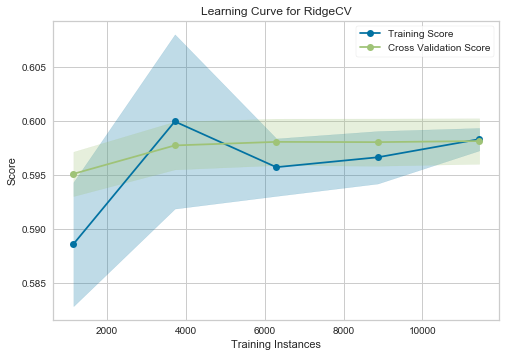

In [57]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
#X, y = load_energy()
X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards',
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']]
y=business[['stars']]
# Instantiate the regression model and visualizer
model = RidgeCV()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure


## 2) Linear Logistic Regression

In [121]:
# Shuffle the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [122]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
log_clf = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg')
log_clf.fit(X_train_scaled, y_train)

scores2 = cross_val_score(log_clf, X_train_scaled, y_train, cv = 10, scoring = 'f1_micro')
scores2.mean()

0.616015394647073

In [124]:
from sklearn.metrics import f1_score
y_pred2 = log_clf.predict(X_test_scaled)
print(f1_score(y_pred2, y_test, average = 'micro'))
print(f1_score(y_pred2, y_test, average = None, labels = [1, 2, 3, 4, 5]))

0.6150262085032032
[0.17142857 0.42194093 0.5740498  0.46527012 0.76809651]


- The results here looks good. This seems to the best at identifying 3 and 5 star reviews.

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid2 = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
log = LogisticRegression()
grid_search2 = GridSearchCV(log, param_grid=param_grid2)
grid_search2.fit(X_train_scaled, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [126]:
grid_search2.best_params_

{'C': 100}

In [127]:
log = LogisticRegression(C = 100)
log.fit(X_train_scaled, y_train)

scores2 = cross_val_score(log, X_train_scaled, y_train, cv = 10, scoring = 'f1_micro')
scores2.mean()

0.5895357165576738

In [128]:
y_pred2 = log.predict(X_test_scaled)
print(f1_score(y_pred2, y_test, average = 'micro'))
print(f1_score(y_pred2, y_test, average = None, labels = [1, 2, 3, 4, 5]))

0.594059405940594
[0.         0.17241379 0.52080537 0.41706161 0.77297626]


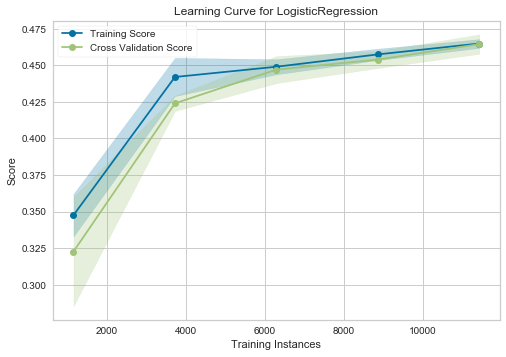

In [129]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
#X, y = load_energy()
X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards',
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']]
y=business[['stars']]
# Instantiate the regression model and visualizer
model = LogisticRegression()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## 3) Ordinal Logistic regression

In [69]:
X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards', 
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']]
y=business[['stars']]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [70]:
import pandas as pd
import numpy as np    
from sklearn import metrics
from sklearn.model_selection import train_test_split
import mord

in_X, out_X, in_y, out_y = train_test_split(X, y,
                                            stratify=y,
                                            test_size=0.1,
                                            random_state=0)

mul_lr = mord.OrdinalRidge(alpha=1.0,
                           fit_intercept=True,
                           normalize=False,
                           copy_X=True,
                           max_iter=None,
                           tol=0.001,
                           solver='auto').fit(in_X, in_y)

In [71]:
y_pred=mul_lr.predict(out_X)
print("Accuracy : ",metrics.accuracy_score(out_y,y_pred))

Accuracy :  0.5806639487478159


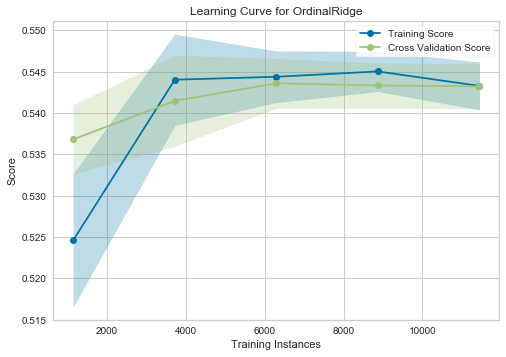

In [72]:
from sklearn.linear_model import RidgeCV

from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import LearningCurve

# Load a regression dataset
#X, y = load_energy()
X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards',
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']]
y=business[['stars']]
# Instantiate the regression model and visualizer
model = mord.OrdinalRidge()
visualizer = LearningCurve(model, scoring='r2')

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

## 4)Neural Network

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [4]:

X=business[['latitude','longitude', 'review_count','BusinessAcceptsCreditCards', 
            'AcceptsInsurance', 'ByAppointmentOnly', 'sentiment']].values
y =business[['stars']].values


In [5]:
print(X.shape)
print(y.shape)

(17163, 7)
(17163, 1)


#### Train and test split 60:40

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [7]:
np.unique(y, return_counts=True)


(array([1, 2, 3, 4, 5], dtype=int64),
 array([ 324, 1519, 3501, 4873, 6946], dtype=int64))

In [8]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
seed = 7
np.random.seed(seed)

Using TensorFlow backend.


### Desigining the neural network

In [30]:
#Initializing Neural Network
classifier = Sequential()

In [31]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 7, kernel_initializer = 'normal', activation = 'relu', input_dim = 7,name="Hidden_1"))
# Adding the second hidden layer
classifier.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'relu',name="Hidden_2"))
classifier.add(Dense(units=3,kernel_initializer='random_uniform',activation='relu',name="Hidden_3"))
# Adding the output layer

classifier.add(Dense(units = 1, kernel_initializer = 'normal',name="Output"))


In [32]:
# Compiling Neural Network
from keras.optimizers import Adam
classifier.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))
print(classifier.optimizer.lr)

<tf.Variable 'Adam_2/learning_rate:0' shape=() dtype=float32>


In [33]:
# Fitting our model 
x=classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
10297/10297 [==============================] - 2s 151us/step - loss: 2.7289
Epoch 2/100
10297/10297 [==============================] - 2s 209us/step - loss: 1.1596
Epoch 3/100
10297/10297 [==============================] - 2s 223us/step - loss: 1.1157
Epoch 4/100
10297/10297 [==============================] - 2s 230us/step - loss: 1.0471
Epoch 5/100
10297/10297 [==============================] - 2s 236us/step - loss: 0.9298
Epoch 6/100
10297/10297 [==============================] - 2s 226us/step - loss: 0.7083
Epoch 7/100
10297/10297 [==============================] - 2s 238us/step - loss: 0.5402
Epoch 8/100
10297/10297 [==============================] - 3s 259us/step - loss: 0.4976
Epoch 9/100
10297/10297 [==============================] - 2s 220us/step - loss: 0.4890
Epoch 10/100
10297/10297 [==============================] - 3s 249us/step - loss: 0.4908
Epoch 11/100
10297/10297 [==============================] - 2s 226us/step - loss: 0.4840
Epoch 12/100
10297/10297 [====

In [34]:
# serialize model to JSON
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

classifier.save_weights("model_1.h5")
print("Saved model to disk")

Saved model to disk


#### Network Architecture

In [35]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden_1 (Dense)             (None, 7)                 56        
_________________________________________________________________
Hidden_2 (Dense)             (None, 5)                 40        
_________________________________________________________________
Hidden_3 (Dense)             (None, 3)                 18        
_________________________________________________________________
Output (Dense)               (None, 1)                 4         
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [36]:
yPrediction = classifier.predict(X_train)

In [37]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yPrediction,y_train):
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
print(correct/(correct+worng))

0.8466543653491309


### Building the 2nd classifier using the misclassified tuples

In [38]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yPrediction,y_train):
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
        if(i==4):
            FOUR=FOUR+1
        newdata.append(0)
    else:
        
        newdata.append(1)
        data2y.append(j)
        worng=worng+1

In [39]:

count=0
temp_data=[]
for i in range(len(newdata)):
    if(newdata[i]==1):
        temp_data.append(X_train[i])
        count=count+1

In [40]:
data2=np.asarray(temp_data)

In [41]:
data2

array([[ 3.50831790e+01, -8.08762320e+01,  1.30000000e+01, ...,
         1.00000000e+00,  1.00000000e+00,  2.97946875e-01],
       [ 4.30975247e+01, -8.95243786e+01,  5.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  3.16203704e-01],
       [ 3.33127615e+01, -1.11875665e+02,  4.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.68365801e-01],
       ...,
       [ 3.52352599e+01, -8.07362100e+01,  4.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.41666667e-01],
       [ 3.61807880e+01, -1.15315521e+02,  1.40000000e+01, ...,
         1.00000000e+00,  1.00000000e+00,  1.32146536e-01],
       [ 3.36854639e+01, -1.11922329e+02,  4.10000000e+01, ...,
         1.00000000e+00,  1.00000000e+00,  6.94425087e-02]])

In [42]:
data2y=np.asarray(data2y)

In [43]:
data2y.shape

(1579, 1)

In [44]:
classifier2 = Sequential()

In [45]:
classifier2.add(Dense(units = 7, kernel_initializer = 'normal', activation = 'relu', input_dim = 7))
# Adding the second hidden layer
classifier2.add(Dense(units = 5, kernel_initializer = 'normal', activation = 'relu'))
classifier2.add(Dense(units=3,kernel_initializer='random_uniform',activation='relu'))
# Adding the output layer
classifier2.add(Dense(units = 1, kernel_initializer = 'normal'))

In [46]:
# Compiling Neural Network
from keras.optimizers import Adam
classifier2.compile(loss='mean_squared_error', optimizer=Adam(lr=0.001))


In [47]:
# Fitting our model 
history2=classifier2.fit(data2, data2y, batch_size = 10, epochs = 100,verbose=1)

Epoch 1/100
1579/1579 [==============================] - 1s 610us/step - loss: 4.7549
Epoch 2/100
1579/1579 [==============================] - 1s 332us/step - loss: 0.9916
Epoch 3/100
1579/1579 [==============================] - 0s 274us/step - loss: 0.9870
Epoch 4/100
1579/1579 [==============================] - 1s 317us/step - loss: 0.9742
Epoch 5/100
1579/1579 [==============================] - 0s 270us/step - loss: 0.9647
Epoch 6/100
1579/1579 [==============================] - 0s 267us/step - loss: 0.9569
Epoch 7/100
1579/1579 [==============================] - 0s 228us/step - loss: 0.9489
Epoch 8/100
1579/1579 [==============================] - 0s 237us/step - loss: 0.9460
Epoch 9/100
1579/1579 [==============================] - 0s 237us/step - loss: 0.9390
Epoch 10/100
1579/1579 [==============================] - 0s 228us/step - loss: 0.9289
Epoch 11/100
1579/1579 [==============================] - 0s 257us/step - loss: 0.9226
Epoch 12/100
1579/1579 [============================

Epoch 95/100
1579/1579 [==============================] - 0s 198us/step - loss: 0.1385
Epoch 96/100
1579/1579 [==============================] - 0s 195us/step - loss: 0.1392
Epoch 97/100
1579/1579 [==============================] - 0s 178us/step - loss: 0.1381
Epoch 98/100
1579/1579 [==============================] - 0s 198us/step - loss: 0.1408
Epoch 99/100
1579/1579 [==============================] - 0s 237us/step - loss: 0.1509
Epoch 100/100
1579/1579 [==============================] - 1s 326us/step - loss: 0.1424


In [48]:
# serialize model to JSON
model_json = classifier2.to_json()
with open("model.json2", "w") as json_file:
    json_file.write(model_json)

classifier2.save_weights("model_2.h5")
print("Saved 2nd model to disk")

Saved 2nd model to disk


# Performance Evaluation

In [49]:
yPrediction2 = classifier2.predict(X_train)

In [50]:
yPrediction = classifier.predict(X_train)

In [51]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j,w in zip(yPrediction,y_train,yPrediction2):
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        if((w-j)<correcta or (j-w)>-correcta):
            correct=correct+1
        else:
            worng=worng+1

In [52]:
correct/(correct+worng)

0.9874720792463825

In [53]:
worng

129

In [55]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yPrediction2,y_test):
    #print(i,j)
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
print(correct/(correct+worng))

0.8616370521409845


In [56]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yPrediction2,y_train):
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
print(correct/(correct+worng))

0.9871807322521122


In [57]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j,w in zip(yPrediction,y_train,yPrediction2):
    q=(i*0.3)+(w*0.7)

    if((q-j)<correcta or (j-q)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
correct/(correct+worng)

0.9722249198795766

In [58]:
yPrediction2_test = classifier2.predict(X_test)
yPrediction_test = classifier.predict(X_test)

In [59]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j,w in zip(yPrediction_test,y_test,yPrediction2_test):
    q=(i*0.3)+(w*0.7)
    if((q-j)<correcta or (j-q)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
correct/(correct+worng)

0.9701427323041072

In [60]:
yP2_test = classifier2.predict(X)
yP_test = classifier.predict(X)

In [61]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j,w in zip(yP_test,y,yP2_test):
    q=(i*0.3)+(w*0.7)
    if((q-j)<correcta or (j-q)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
correct/(correct+worng)

0.9713919477946746

In [62]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yP_test,y):
    #print(i,j)
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
print(correct/(correct+worng))

0.8468216512264756


In [63]:
worng=correct=FOUR=0
correcta=0.5
newdata=[]
data2y=[]
for i,j in zip(yP2_test,y):
    #print(i,j)
    if((i-j)<correcta or (j-i)>-correcta):
        correct=correct+1
    else:
        worng=worng+1
print(correct/(correct+worng))

0.9871817281361067


In [93]:
business.columns

Index(['business_id', 'name', 'address', 'postal_code', 'city', 'hours',
       'latitude', 'longitude', 'review_count', 'stars',
       'BusinessAcceptsCreditCards', 'AcceptsInsurance', 'ByAppointmentOnly',
       'categories', 'sentiment'],
      dtype='object')

### Adding predicted stars to the original business file

In [94]:
business['stars']=yP_test

In [95]:
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4.098886,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,None,35.991159,-115.108455,13,2.581132,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,4.317896,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,4.713391,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,None,41.513554,-81.613752,11,3.792003,1,1,1,"Health & Medical, Medical Centers",0.201154


In [96]:
business['stars']=np.floor(business.stars).astype(int)

In [97]:
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,None,35.991159,-115.108455,13,2,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,4,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,4,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,None,41.513554,-81.613752,11,3,1,1,1,"Health & Medical, Medical Centers",0.201154


In [91]:
business['stars'].unique()

array([4, 2, 3, 1, 5], dtype=int64)

In [2]:
business=pd.read_json("Final_dataset.json",lines=True)
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
0,zSpQmEBvRe3IhTUlMSA6HQ,Totum Life Science,"445 King Street W, Suite 101",M5V 1K4,Toronto,"{'Monday': '6:0-22:0', 'Tuesday': '6:0-22:0', ...",43.645041,-79.395799,23,4,1,1,0,"Trainers, Health & Medical, Active Life, Physi...",0.243262
1,n2kOsDur7tCLygSa87glJQ,A Woman's Place,"2789 Sunridge Heights Pkwy, Ste 100",89052,Henderson,None,35.991159,-115.108455,13,3,1,1,1,"Medical Centers, Doctors, Obstetricians & Gyne...",0.067207
2,teknANRU8ZKnwdIHWYyd8Q,Key To Healing Massage,14202 N Scottsdale Rd,85254,Scottsdale,"{'Tuesday': '10:0-18:0', 'Wednesday': '10:0-18...",33.616838,-111.927310,10,5,1,1,0,"Massage Therapy, Massage, Health & Medical, Be...",0.269978
3,5ws3QWQXUhqTeLd7IZsDww,"Stephen L Walker, DDS, MS","2220 W Southern Ave, Ste 102, Endodontic Speci...",85202,Mesa,"{'Monday': '7:0-19:30', 'Tuesday': '7:0-19:30'...",33.393546,-111.878890,3,5,1,1,1,"Health & Medical, Endodontists, Dentists",0.457209
4,YNvZdMLXa4q8e9tiE4ge4A,Louis Stokes Cleveland VA Medical Center,10701 E Blvd,44106,Cleveland,None,41.513554,-81.613752,11,4,1,1,1,"Health & Medical, Medical Centers",0.201154


In [3]:
business.sort_values("stars",axis=0,ascending=False,inplace=True)

### Sorting business file in descending order with respect to stars

In [4]:
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
17162,1pcqM_Ptk9Ee-VmqE1qiBg,Ploucha Chiropractic Center,1927 E Carson St,15203,Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",40.428768,-79.977941,5,5,1,1,0,"Chiropractors, Health & Medical",0.234132
5686,p8KMel_CZQ2wVVXx2JLfaA,Adelaide West Physiotherapy,"366 Adelaide Street W, Suite 403",M5V 1R9,Toronto,"{'Monday': '7:30-19:0', 'Tuesday': '7:30-19:0'...",43.647262,-79.394406,7,5,1,1,1,"Fitness & Instruction, Active Life, Health & M...",0.188752
5705,ZQBUBnccfiCzQTrEwNy-xw,All American Dave's Fit Food Truck,4291 Polaris Ave,89103,Las Vegas,"{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ...",36.107558,-115.181217,10,5,1,1,1,"Health & Medical, Nutritionists, Food Trucks, ...",0.375238
12253,ICSNM7k_h7gCLtiH1Y1uUA,"Arizona Physical Medicine and Rehabilitation, PC","5690 W Chandler Blvd, Ste 2",85226,Chandler,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",33.305923,-111.939643,4,5,1,1,1,"Pediatricians, Doctors, Health & Medical, Spor...",0.189058
12255,8aMRTp_ue5FPI1I00gnhrw,Island Dental Center of Summerlin,"9750 Covington Cross Dr, Ste 100",89144,Las Vegas,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",36.183636,-115.308344,41,5,1,1,1,"Dentists, Health & Medical, Cosmetic Dentists,...",0.336234


In [5]:
business = business.reset_index(drop=True)
business.index +=1

### Recommending top 5 health care services

In [6]:
business.head()

,business_id,name,address,postal_code,city,hours,latitude,longitude,review_count,stars,BusinessAcceptsCreditCards,AcceptsInsurance,ByAppointmentOnly,categories,sentiment
1,1pcqM_Ptk9Ee-VmqE1qiBg,Ploucha Chiropractic Center,1927 E Carson St,15203,Pittsburgh,"{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ...",40.428768,-79.977941,5,5,1,1,0,"Chiropractors, Health & Medical",0.234132
2,p8KMel_CZQ2wVVXx2JLfaA,Adelaide West Physiotherapy,"366 Adelaide Street W, Suite 403",M5V 1R9,Toronto,"{'Monday': '7:30-19:0', 'Tuesday': '7:30-19:0'...",43.647262,-79.394406,7,5,1,1,1,"Fitness & Instruction, Active Life, Health & M...",0.188752
3,ZQBUBnccfiCzQTrEwNy-xw,All American Dave's Fit Food Truck,4291 Polaris Ave,89103,Las Vegas,"{'Monday': '9:0-23:0', 'Tuesday': '9:0-23:0', ...",36.107558,-115.181217,10,5,1,1,1,"Health & Medical, Nutritionists, Food Trucks, ...",0.375238
4,ICSNM7k_h7gCLtiH1Y1uUA,"Arizona Physical Medicine and Rehabilitation, PC","5690 W Chandler Blvd, Ste 2",85226,Chandler,"{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ...",33.305923,-111.939643,4,5,1,1,1,"Pediatricians, Doctors, Health & Medical, Spor...",0.189058
5,8aMRTp_ue5FPI1I00gnhrw,Island Dental Center of Summerlin,"9750 Covington Cross Dr, Ste 100",89144,Las Vegas,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",36.183636,-115.308344,41,5,1,1,1,"Dentists, Health & Medical, Cosmetic Dentists,...",0.336234
